
<div align="center" style="color:Blue;font-size:20px">Car Types Segmentation using DBSCAN</div>

### Task1

In [30]:
#importing dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [31]:
df=pd.read_csv("DS2_C6_S4_CarSales_Data_Challenge.csv")

In [32]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [33]:
df.drop(["__year_resale_value","Latest_Launch"],axis=1,inplace=True)

In [34]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Power_perf_factor     2
dtype: int64

In [35]:
#missing value treatment
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())

In [36]:
df1=df.copy()

In [37]:
df.shape

(157, 14)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Price_in_thousands  157 non-null    float64
 5   Engine_size         157 non-null    float64
 6   Horsepower          157 non-null    float64
 7   Wheelbase           157 non-null    float64
 8   Width               157 non-null    float64
 9   Length              157 non-null    float64
 10  Curb_weight         157 non-null    float64
 11  Fuel_capacity       157 non-null    float64
 12  Fuel_efficiency     157 non-null    float64
 13  Power_perf_factor   157 non-null    float64
dtypes: float64(11), object(3)
memory usage: 17.3+ KB


In [39]:
c=df.select_dtypes(include="object").columns.to_list()
df.drop(c,axis=1,inplace=True)

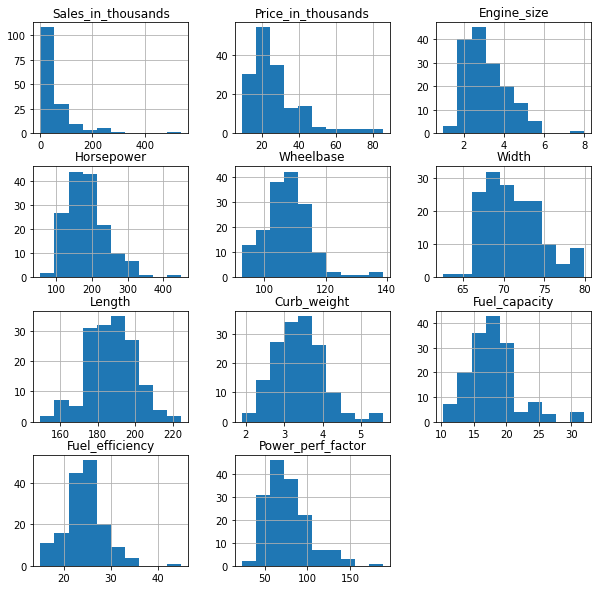

In [40]:
#distribution of all numeric values
df.hist(figsize=(10,10))
plt.show()

In [41]:
#Scaling using Standard scaler
scaler=StandardScaler()

In [42]:
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [43]:
df.head()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,-0.532042,-4.144370e-01,-1.214763,-0.81559,-0.828080,-1.122510,-1.119712,-1.183485,-1.230087,0.982981,-0.753513
1,-0.200761,7.100423e-02,0.134013,0.69316,0.080714,-0.247827,0.416338,0.222555,-0.194644,0.273392,0.575359
2,-0.573406,-1.249734e-15,0.134013,0.69316,-0.077337,-0.160359,0.348901,0.147289,-0.194644,0.509921,0.000000
3,-0.654896,1.027816e+00,0.423037,0.42691,0.936825,0.072890,0.693576,0.755825,0.012445,-0.436198,0.576122
4,-0.480754,-2.392560e-01,-1.214763,-0.63809,-0.643687,-0.860105,-0.700108,-0.608578,-0.401732,0.746451,-0.572900


### Task2

In [44]:
#applying dbscan on two features-width and legth of cars with eps=0.35 and min and samples=11

In [45]:
dfc=df[["Width","Length"]]

In [46]:
model=DBSCAN(eps=0.35,min_samples=11).fit(dfc)

In [47]:
labels=model.labels_
dfc1=dfc.copy()
dfc1["labels"]=labels

<AxesSubplot:xlabel='Width', ylabel='Length'>

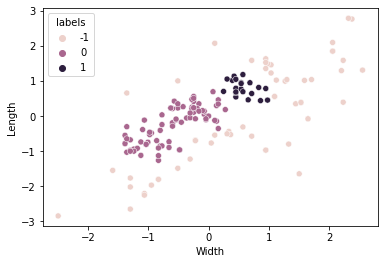

In [48]:
#length vs width clustering visualization
sns.scatterplot(data=dfc1,x="Width",y="Length",hue="labels")

In [49]:
labels

array([ 0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  1,  1, -1,  1, -1, -1, -1,
        0, -1,  0,  0,  1,  1,  1, -1,  0, -1,  1,  0,  0, -1,  0, -1,  0,
        1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0,  1,  0,
       -1,  0, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1,
       -1, -1,  0,  0,  0,  1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  1, -1,  0, -1,  0,  0,  1, -1, -1, -1,  0,  1, -1,  0,
        0,  0, -1,  0, -1, -1,  0,  1,  0, -1,  0,  1, -1,  0, -1, -1,  0,
        0,  1,  1,  1,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1, -1,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0,
        0,  0,  0,  0], dtype=int64)

In [50]:
dfc1["labels"].value_counts()

 0    80
-1    56
 1    21
Name: labels, dtype: int64

In [51]:
#this algorithm  considered many as outliers since they are not densely packed

### Task3

In [23]:
#choosing best eps and min samples

In [60]:
nn=NearestNeighbors(n_neighbors=2).fit(df)

In [61]:
distances,indices=nn.kneighbors(df)

In [57]:
distances

array([[0.        , 1.01666366],
       [0.        , 0.5442047 ],
       [0.        , 0.75745264],
       [0.        , 1.0233848 ],
       [0.        , 0.6550138 ],
       [0.        , 1.39458783],
       [0.        , 1.08150539],
       [0.        , 0.63552035],
       [0.        , 0.79866632],
       [0.        , 0.89831365],
       [0.        , 0.80623255],
       [0.        , 0.75788415],
       [0.        , 1.0221558 ],
       [0.        , 0.76514833],
       [0.        , 1.16351864],
       [0.        , 1.01915335],
       [0.        , 0.86975594],
       [0.        , 0.8843669 ],
       [0.        , 1.43006004],
       [0.        , 1.09912341],
       [0.        , 0.5887043 ],
       [0.        , 0.78380608],
       [0.        , 0.78380608],
       [0.        , 0.16743711],
       [0.        , 2.48297409],
       [0.        , 0.79272175],
       [0.        , 3.88982394],
       [0.        , 0.80623255],
       [0.        , 0.24209573],
       [0.        , 0.86534456],
       [0.

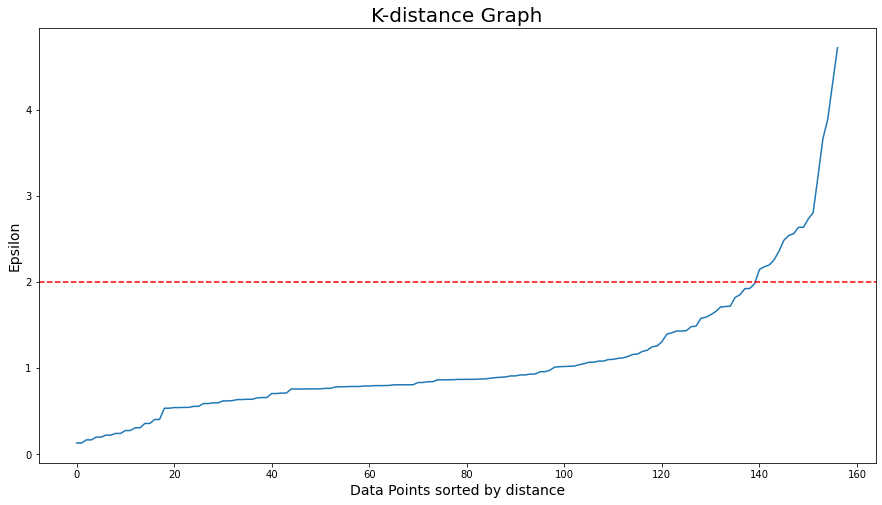

In [62]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=2, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [28]:
#choosing epsilon as 2 and finding best min samples

In [63]:
#eps=2
for eps in np.arange(1.5,3,0.1):
    for min_samples in range(2,15):
        clusterer = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = clusterer.fit_predict(df)
        x= cluster_labels +2 
        y = np.bincount(x)
        ii = np.nonzero(y)[0]
        results = list(zip(ii,y[ii]) )
        
        print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 1.5 | min_samples=  2 | obtained clustering:  [(1, 29), (2, 109), (3, 3), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2)]
eps= 1.5 | min_samples=  3 | obtained clustering:  [(1, 45), (2, 109), (3, 3)]
eps= 1.5 | min_samples=  4 | obtained clustering:  [(1, 49), (2, 104), (3, 4)]
eps= 1.5 | min_samples=  5 | obtained clustering:  [(1, 55), (2, 102)]
eps= 1.5 | min_samples=  6 | obtained clustering:  [(1, 57), (2, 100)]
eps= 1.5 | min_samples=  7 | obtained clustering:  [(1, 57), (2, 100)]
eps= 1.5 | min_samples=  8 | obtained clustering:  [(1, 58), (2, 99)]
eps= 1.5 | min_samples=  9 | obtained clustering:  [(1, 64), (2, 93)]
eps= 1.5 | min_samples=  10 | obtained clustering:  [(1, 65), (2, 92)]
eps= 1.5 | min_samples=  11 | obtained clustering:  [(1, 65), (2, 92)]
eps= 1.5 | min_samples=  12 | obtained clustering:  [(1, 65), (2, 92)]
eps= 1.5 | min_samples=  13 | obtained clustering:  [(1, 68), (2, 89)]
eps= 1.5 | min_samples=  14 | obtained clustering:  [(1, 74)

eps= 2.3000000000000007 | min_samples=  9 | obtained clustering:  [(1, 23), (2, 134)]
eps= 2.3000000000000007 | min_samples=  10 | obtained clustering:  [(1, 23), (2, 134)]
eps= 2.3000000000000007 | min_samples=  11 | obtained clustering:  [(1, 23), (2, 134)]
eps= 2.3000000000000007 | min_samples=  12 | obtained clustering:  [(1, 25), (2, 132)]
eps= 2.3000000000000007 | min_samples=  13 | obtained clustering:  [(1, 25), (2, 132)]
eps= 2.3000000000000007 | min_samples=  14 | obtained clustering:  [(1, 25), (2, 132)]
eps= 2.400000000000001 | min_samples=  2 | obtained clustering:  [(1, 12), (2, 139), (3, 4), (4, 2)]
eps= 2.400000000000001 | min_samples=  3 | obtained clustering:  [(1, 14), (2, 139), (3, 4)]
eps= 2.400000000000001 | min_samples=  4 | obtained clustering:  [(1, 14), (2, 139), (3, 4)]
eps= 2.400000000000001 | min_samples=  5 | obtained clustering:  [(1, 18), (2, 139)]
eps= 2.400000000000001 | min_samples=  6 | obtained clustering:  [(1, 18), (2, 139)]
eps= 2.400000000000001

In [ ]:
#here we can see for all epsilon from 1.5-3 and n_samples from 2-15 we can see that this algo is putting all points into single cluster or putting them as outliers

### Task4

In [38]:
#silhoutte scores for different min samples
silhouette={}
nl={}
for i in range(2,15):
        cluster=DBSCAN(eps=2,min_samples=i).fit(df)
        labels=cluster.labels_
        nl[i]=len(np.unique(labels))
        silhouette[i]=(silhouette_score(df,labels))
silhouette

{2: 0.06350239686810545,
 3: 0.09055247172457617,
 4: 0.3331993085751169,
 5: 0.3331993085751169,
 6: 0.3236096693710021,
 7: 0.3236096693710021,
 8: 0.3287660641444895,
 9: 0.3287660641444895,
 10: 0.3287660641444895,
 11: 0.32785302270015176,
 12: 0.32785302270015176,
 13: 0.32785302270015176,
 14: 0.32785302270015176}

In [29]:
#applying dbscan on all features with min samples and eps as chosen above

In [30]:
model1=DBSCAN(eps=2,min_samples=4).fit(df)

In [31]:
labels1=model1.labels_

In [32]:
df1["labels"]=labels1

In [33]:
#number of data points in each cluster.most of them are in a single cluster
df1["labels"].value_counts()

 0    131
-1     23
 1      3
Name: labels, dtype: int64

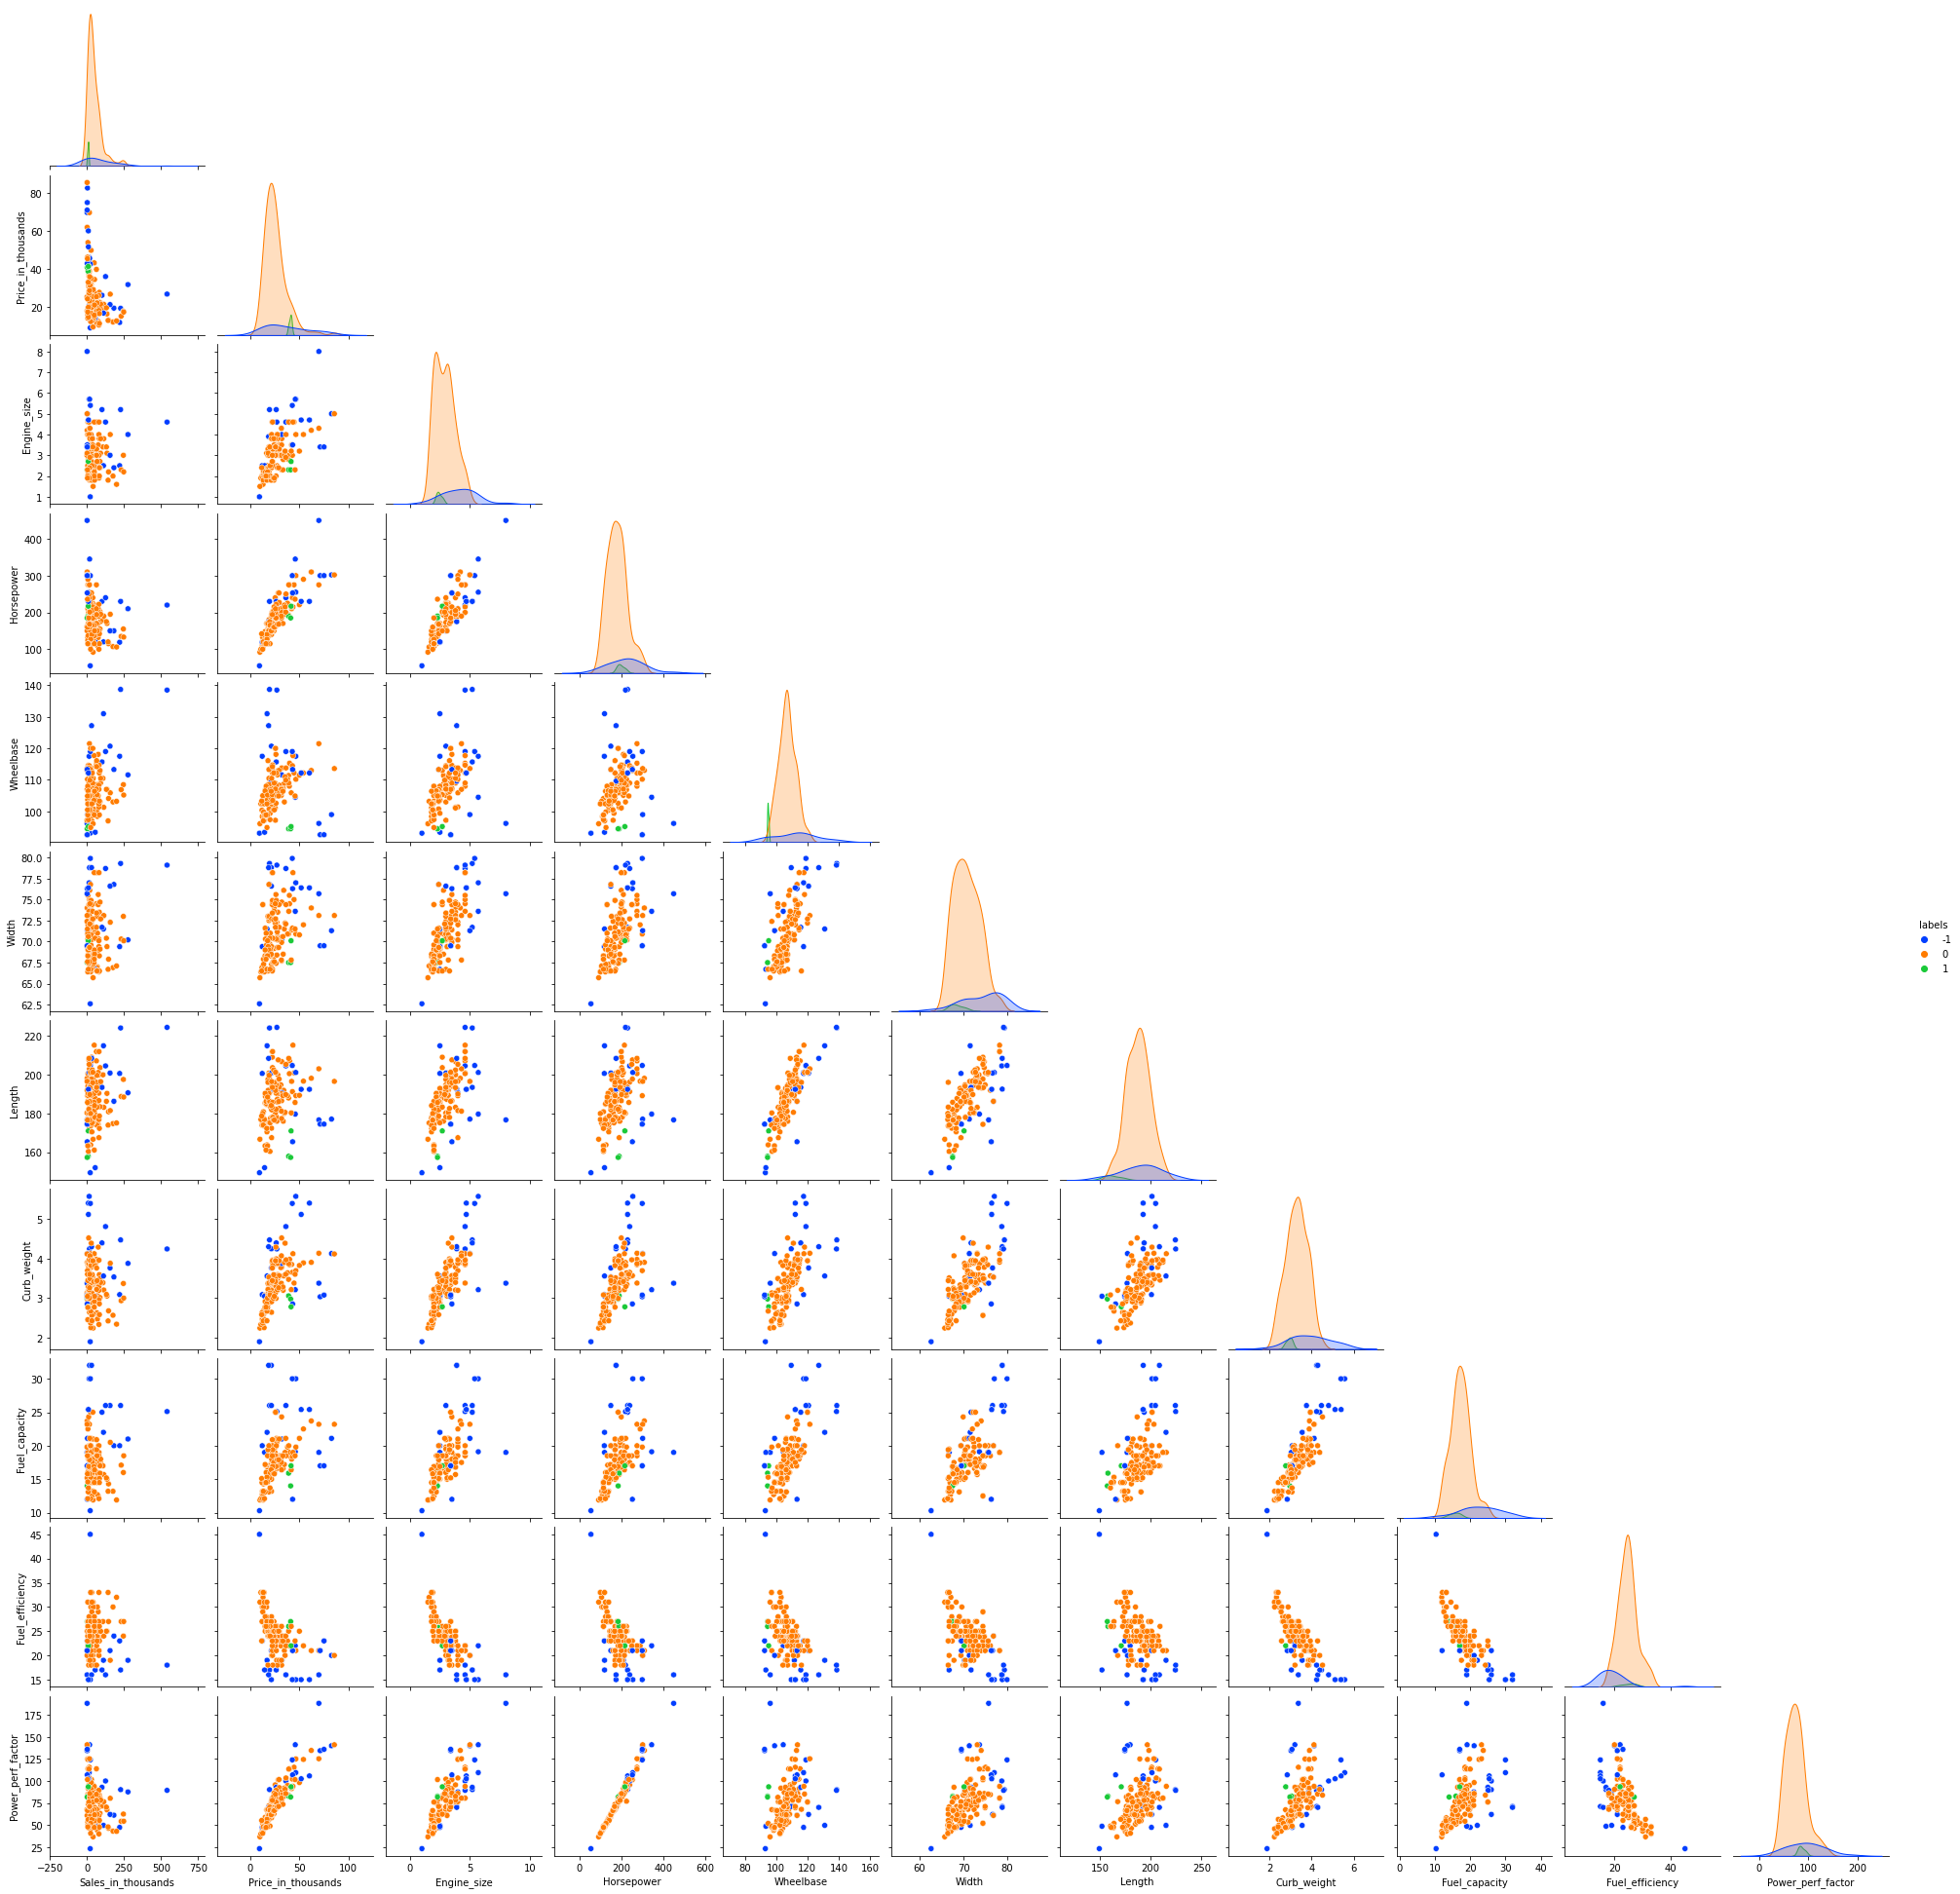

In [34]:
#pairplot of all features
sns.pairplot(df1,hue="labels",palette="bright",corner=True)

In [ ]:
#from this we can see that DBSCAN algorithm coudnt cluster into many cluster for car dataset since all values are densely packed and 
#it has considered most of the values into a single cluster and some noise as outliers.